# Getting Started

In this notebook we use `boax` to setup a simple bayesian optimization experiment.

## Setting up the environment

In [1]:
from jax import config

config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
from jax import numpy as jnp

plt.style.use('bmh')

from boax.experiments import optimization
from boax.experiments.benchmarks import forrester_1d

## Defining the latent objective function

In bayesian optimization we treat the objective as an expensive to evaluate black box function. Hence, there are a limited number of times we can afford to query the objective function. For this example we choose the 1-dimensional Forrester et al. function, that we aim to minimize in the interval of `[0, 1]`. The Forrester et al. function is already implemented as one of many benchmarks functions in `boax.experiments.benchmarks`, however we need to multiply the function by -1 so to find the minimum instead of the optimum.

In [2]:
def objective(x):
    return -forrester_1d.objective(
        jnp.array(x)[jnp.newaxis, ...]
    )

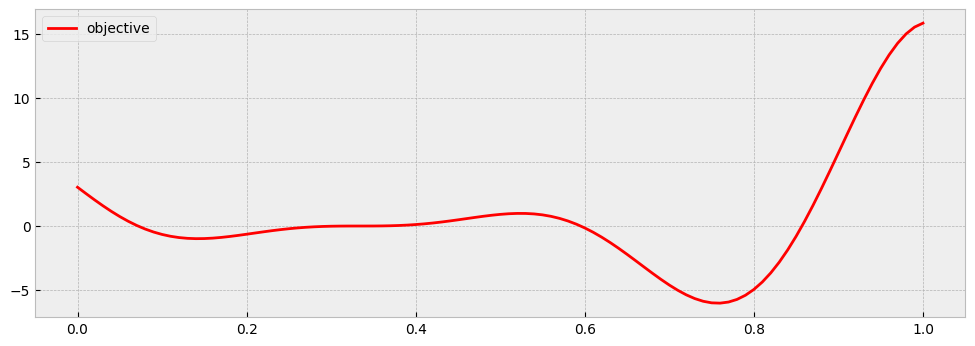

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))

xs = jnp.linspace(0, 1, 101)[..., jnp.newaxis]
ys = forrester_1d.objective(xs)

ax.plot(xs, ys, c='r', label='objective')
ax.legend()

plt.show()

## Running the optimization experiment

We initialise the experiment by defining the parameters we want to optimise. In this case we want to to optimise the value `x` within the bounds of `[0, 1]`.

In [4]:
experiment = optimization(
    parameters=[
        {
            'name': 'x',
            'type': 'range',
            'bounds': [0.0, 1.0],
        },
    ],
)

Next we initialise the step and results values by setting them to `None` and an empty list. In case we already had sampled the objective function beforehand we can could have initialised the results value starting with these samples.

In [5]:
step, results = None, []

Finally we run the experiment. For demonstration purposes we run the experiment for 25 steps, which should be sufficient to get close to the actual optimal function value. The first 12 steps are random samples exploring the search space and only thereafter we start using bayesian optimisation. The number of warm up steps can be setup by setting the `num_warm_up_steps` to different value when calling `boax.experiments.optimisation`.

In [6]:
for _ in range(25):
    # Print progress
    print('.', end='')

    # Retrieve next parameterizations to evaluate
    step, parameterizations = experiment.next(step, results)

    # Evaluate parameterizations
    evaluations = [
        objective(parameterization['x'])
        for parameterization in parameterizations
    ]
    
    results = list(
        zip(parameterizations, evaluations)
    )

.........................

After running the experiment for 25 steps we can make our best guess at the function's optimal parameterization and function value. For the relatively simple objective function we get very close to its actual optimum.

In [7]:
# Predicted best
experiment.best(step)

({'x': 0.7657085486555452}, 5.981018898644011)

In [8]:
# Actual best
{'x': forrester_1d.optima[0]}, objective(forrester_1d.optima[0])

({'x': Array(0.757249, dtype=float64)}, Array(6.02074006, dtype=float64))